# Llamadas al 911

Para este proyecto, analizaremos algunos datos de llamadas al 911 de [Kaggle] (https://www.kaggle.com/mchirico/montcoalert). Los datos contienen los siguientes campos:

* lat: String variable, latitud
* lng: String variable, longitud
* desc: String variable, Descripción de la llamada de emergencia
* zip: String variable, código postal
* título: String variable, título
* timeStamp: String variable, AAAA-MM-DD HH: MM: SS
* twp: String variable, municipio
* addr: String variable, dirección
* e: String variable, variable ficticia (siempre 1)

¡Simplemente sigue este cuaderno e intenta completar las instrucciones o responde a las preguntas en negrita, usando tus habilidades de Python y Data Science!

## Datos y Configuración

** Importar numpy and pandas **

** Importar las librerias de visualización y %matplotlib inline. **

** Carga el archivo "911,csv" en un dataframe llamado df **

** Revisa la info() del df **

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Revisa el encabezado **

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1

## Preguntas Básicas

** ¿Cuáles son los 5 códigos postales principales de llamadas al 911? **

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** ¿Cuáles son los 5 principales municipios (twp) para llamadas al 911? **

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Echa un vistazo a la columna 'title', ¿cuántos códigos de título únicos hay? ** **

110

## Crear nuevas características

** La columna 'title' es una combinación de la razón de la llamada (por categoría) y una descripción. Las razones son EMS (Emergency Medial Services) , Fire y Traffic. Use .apply () con una expresión lambda personalizada, para crear una nueva columna llamada 'Reason' que contenga este valor. **

** Por ejemplo, si la columna 'title' es EMS: BACK PAINS/INJURY, la columna 'Reason' debe ser EMS. **

** ¿Cuál es la razón más común para una llamada al 911 basada en esta nueva columna? **

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Ahora usa seaborn para crear un diagrama de conteo de llamadas al 911 por Reason. **

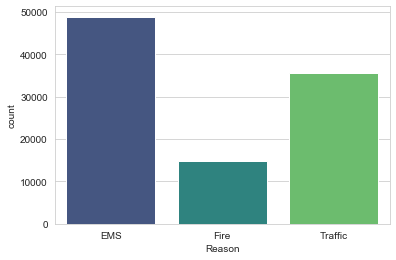

** Ahora comencemos a enfocarnos en la información del tiempo. ¿Cuál es el tipo de datos de los objetos en la columna timeStamp? **

str

** Como puedes observar, esta columna de tiempo sigue siendo una cadena. Usa [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para convertir la columna de cadenas a objetos DateTime. **

** Ahora puedes obtener atributos específicos de un objeto Datetime llamándolos. Por ejemplo:**

    time = df ['timeStamp']. iloc [0]
    time.hour

** Puedes usar el método de tabulación de Jupyter, para explorar los diversos atributos que se pueden llamar. Ahora que la columna de fecha y hora son en realidad objetos de fecha y hora, usa .apply () para crear 3 nuevas columnas llamadas 'Hour', 'Month' y 'Day of Week'. Crea estas columnas a partir de la columna timeStamp, haz referencia a las soluciones si este paso es demasiado difícil. **

** Observa cómo el Día de la semana es un entero entre 0-6. Usa .map () con este diccionario, para asignar los nombres de cadena al día de la semana: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

** Ahora usa seaborn para crear un diagrama de conteo, de la columna 'Day of Week' con el tono basado en la columna 'Reason'. **

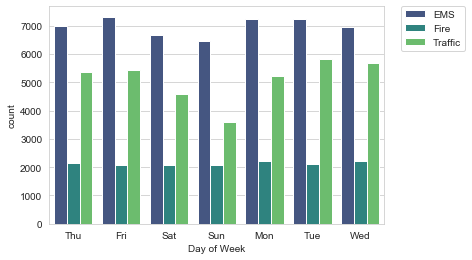

** Haz lo mismo para 'Month'**

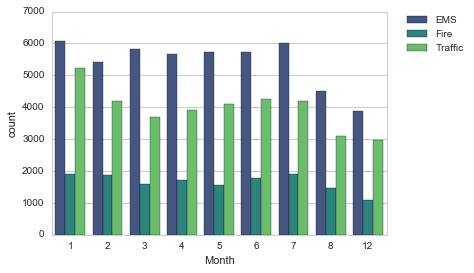

** ¿Notaste algo extraño en el gráfico? **

** Deberías haber notado que faltaban algunos meses, veamos si tal vez podemos completar esta información trazando la información de otra manera; posiblemente un diagrama lineal simple que complete los meses faltantes. Para hacer esto, ' Necesitaremos trabajar con pandas ... **

** Ahora crea dataframe llamado 'byMonth' mediante groupby usando 'Month', donde se agrupe el dataframe por la columna 'Month' y usa el método count () para la agregación. Usa el método head () en este DataFrame, para verificar que es correcto. **

lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Month                                                                      
1      13205  13205  13205  11527  13205      13205  13203  13096  13205   
2      11467  11467  11467   9930  11467      11467  11465  11396  11467   
3      11101  11101  11101   9755  11101      11101  11092  11059  11101   
4      11326  11326  11326   9895  11326      11326  11323  11283  11326   
5      11423  11423  11423   9946  11423      11423  11420  11378  11423   

       Reason   Hour  Day of Week  
Month                              
1       13205  13205        13205  
2       11467  11467        11467  
3       11101  11101        11101  
4       11326  11326        11326  
5       11423  11423        11423

** Ahora crea un diagrama simple con el dataframe, que indique el recuento de llamadas por mes. **

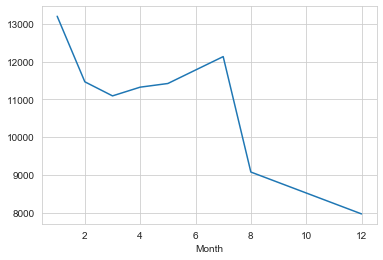

** Ahora revisa si puedes usar lmplot () de seaborn, para crear un ajuste lineal en la cantidad de llamadas por mes. Ten en cuenta que es posible que debas restablecer el índice a una columna. **

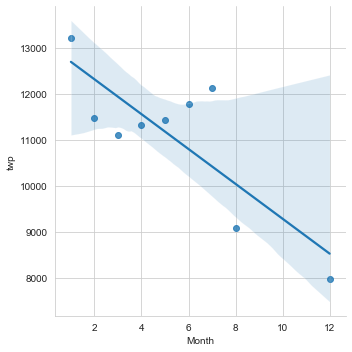

** Crea una nueva columna llamada 'Date', que contenga la fecha de la columna timeStamp. Deberá usar apply junto con el método .date (). **

** Ahora agrupa por esta columna 'Date' con el agregado count () y crea un diagrama de recuentos de llamadas al 911. **

** Ahora recrea el gráfico, pero ahora crea 3 gráficos separados para representar el motivo de la llamada al 911 **

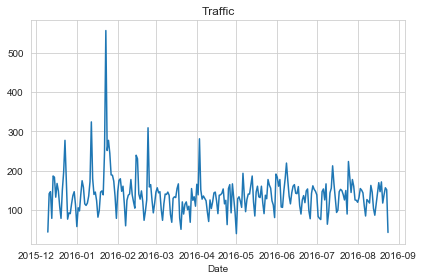

** Ahora pasemos a crear mapas de calor con seaborn y nuestros datos. Primero tendremos que reestructurar el dataframe, para que las columnas se conviertan en las horas y el índice se convierta en el día de la semana. Hay muchas maneras de hacer esto, pero recomendaría intentar combinar groupby con un método [unstack] (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) . ¡Consulta las soluciones si esto es demasiado complicado! **

Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15  \
Day of Week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  

[5 rows x 24 columns]

** Ahora crea un HeatMap usando este nuevo DataFrame. **

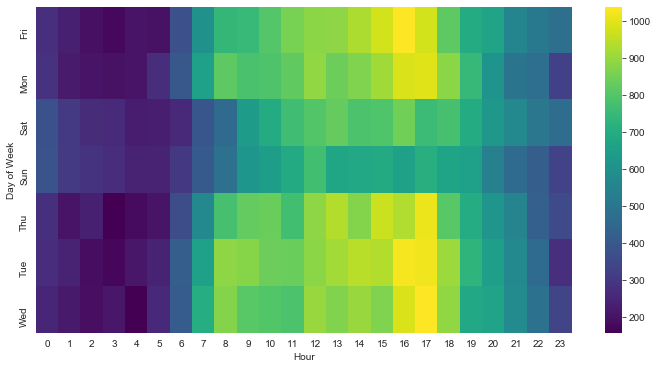

** Ahora crea un mapa de clúster con este DataFrame. **

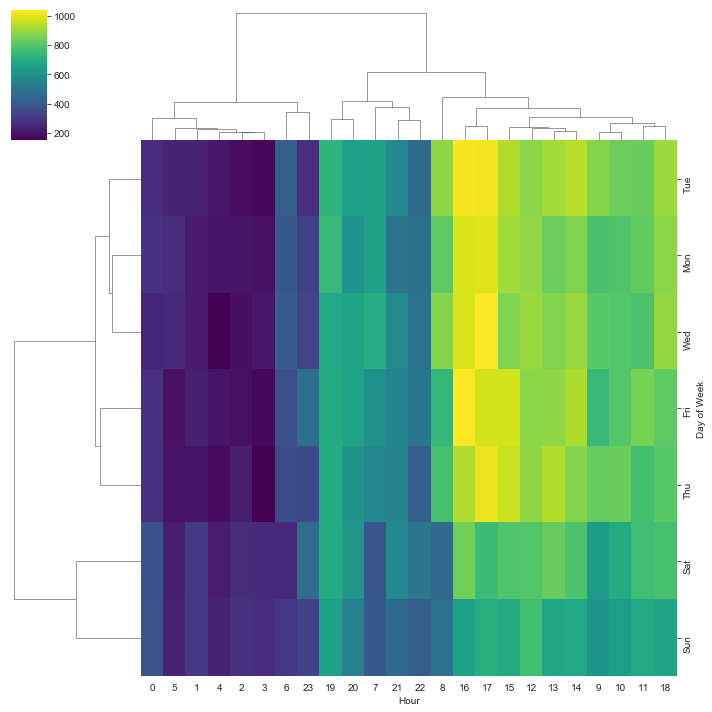

** Ahora repite estos mismos gráficos y operaciones, para un DataFrame que muestra el Mes como la columna. **

Month          1     2     3     4     5     6     7     8     12
Day of Week                                                      
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Sat          2291  1441  1266  1734  1444  1388  1695  1099   978
Sun          1960  1229  1102  1488  1424  1333  1672  1021   907
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266

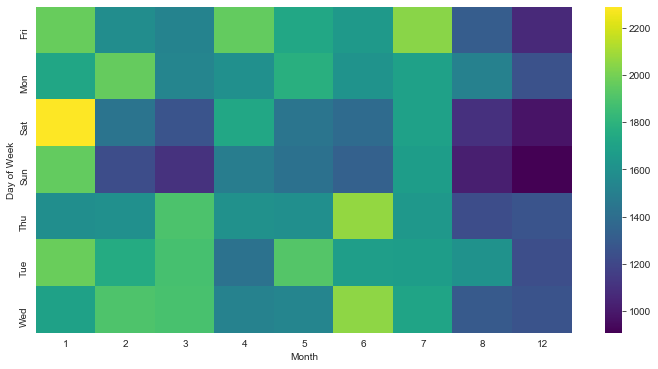

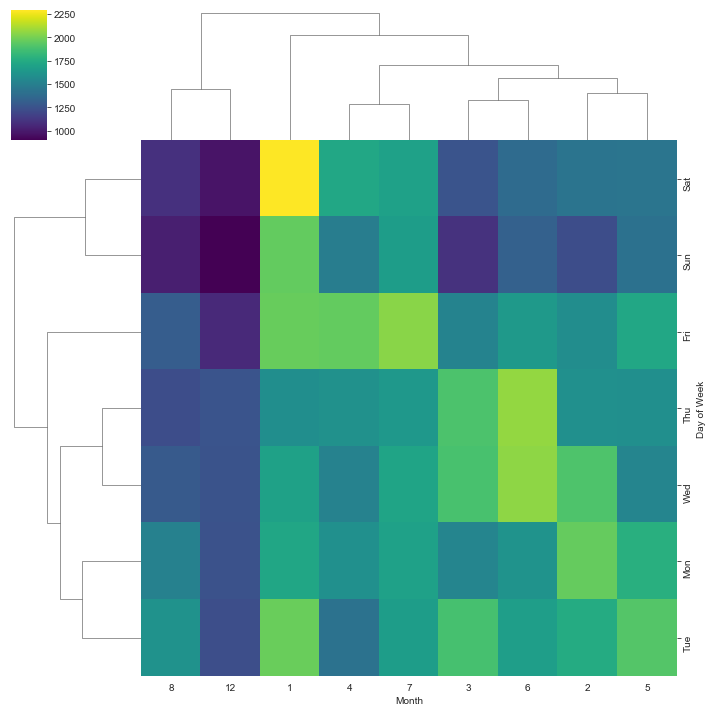

** ¡Continúa explorando los datos como mejor te parezca! **

# ¡Buen trabajo!